In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import model_based_agent as mba 
import worm_env as we 
import fake_worm as fw
import ensemble_mod_env as eme

from improc import *
import utils as ut
import tab_agents as tab
from datetime import datetime 

In [14]:
folds = ['./Data/Det02-02-16-45/',
        './Data/Learned02-02-13-48/',
        './Data/Learned02-02-18-29/',
        './Data/Learned02-02-19-43/',
        './Data/Random02-02-15-10/',
        ]

In [9]:
def load_folder(fold,name,n=15):
    # Loads trajectories into a dict with lists of arrays. 
    trajs = []
    for i in range(n):
        with open(f'{fold}{name}{i}.pkl','rb') as f:
            trajs.append(pickle.load(f))
    
    t_dict = {}
    for k in trajs[0].keys():
        t_dict[k] = [np.array(trajs[i][k]).flatten() for i in range(n)]
        if k=='loc' or k=='obs':
            t_dict[k] = [t_dict[k][i].reshape(-1,2) for i in range(n)]
    return t_dict

In [51]:
dets = load_folder(folds[0],'det')
learneds = []
for l in np.arange(3)+1:
    learneds.append(load_folder(folds[l],name='learned'))
rands = load_folder(folds[-1],'random')

In [52]:
n=15
det_rs = [np.mean(dets['reward'][i]) for i in range(n)]
learned_rs = [[np.mean(learneds[j]['reward'][i]) for i in range(n)] for j in range(3)]
rand_rs = [np.mean(rands['reward'][i]) for i in range(n)]

In [53]:
det_rs = np.delete(det_rs,[8,9,10]) # Deleted episodes where worm was lost. Data in this set are messy; will recollect

In [56]:
mean_vec = [np.mean(det_rs),*[np.mean(learned_rs[i]) for i in range(3)],np.mean(rand_rs)]
std_vec = [np.std(det_rs),*[np.std(learned_rs[i]) for i in range(3)],np.std(rand_rs)]
plot_vec = [0,.95,1,1.05,2]

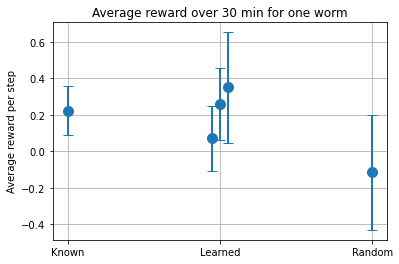

In [57]:
plt.errorbar(plot_vec,mean_vec,yerr=std_vec,marker='o',markersize=10,capsize=5,linewidth=0,elinewidth=2)
plt.grid();
plt.title('Average reward over 30 min for one worm')
plt.xticks([0,1,2],['Known','Learned','Random']);
plt.ylabel('Average reward per step');

# Next for experiments:
#### Control: No light
#### More known and random worms

Online learning: goals are to learn timescale and efficiency. 

Can I learn the timescale from the current 3 hrs of random data?
